In [1]:
#  Importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Defining the path to raw data
file_path = r"C:\Users\ayush\Desktop\vs\Customer_churn\WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [3]:
# Generating a dataframe
df = pd.read_csv(file_path)

In [4]:
# Taking a look at the data
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Understanding the information of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Convert 'TotalCharges' column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [7]:
# Checking the null values 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

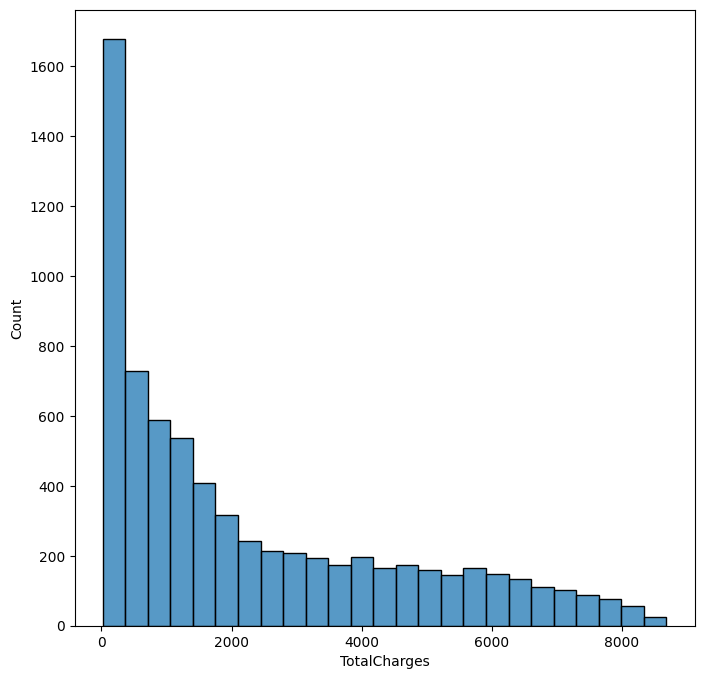

In [8]:
# Checking for the distribution of total charges 
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize = (8,8))
sns.histplot(df.TotalCharges)
plt.show()

In [9]:
# # The imputer will replace missing values with the mean of the non-missing values for the respective columns
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
# df.TotalCharges = imputer.fit_transform(df["TotalCharges"].values.reshape(-1, 1))

## OR

In [10]:
# Filling the missing values in total charges with median values
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_7252\1014313707.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [11]:
# Chrcking the null values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# Converting Churn values 
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [13]:
# Converting categorical columns to numerical using one hot encoding
categorical_Columns = ['gender','Partner','Dependents',
                       'PhoneService','MultipleLines','InternetService','OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV',
                         'StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
df = pd.get_dummies(df, columns=categorical_Columns, drop_first=True)


In [14]:
# Taking a look at the data
df.tail(5)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7038,6840-RESVB,0,24,84.80,1990.50,0,True,True,True,True,...,False,True,False,True,True,False,True,False,False,True
7039,2234-XADUH,0,72,103.20,7362.90,0,False,True,True,True,...,False,True,False,True,True,False,True,True,False,False
7040,4801-JZAZL,0,11,29.60,346.45,0,False,True,True,False,...,False,False,False,False,False,False,True,False,True,False
7041,8361-LTMKD,1,4,74.40,306.60,1,True,True,False,True,...,False,False,False,False,False,False,True,False,False,True
7042,3186-AJIEK,0,66,105.65,6844.50,0,True,False,False,True,...,False,True,False,True,False,True,True,False,False,False


In [15]:
# Chrcking the null values 
df.isnull().sum()



customerID                               0
SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

In [16]:
# Chrcking the nan values 
df.isna().sum()

customerID                               0
SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

## Do the visualization above this

In [17]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['Churn','customerID'],axis = 1))
scaled_features = scaler.transform(df.drop(['Churn','customerID'],axis = 1))

In [18]:
# Splitting the data
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df['Churn']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, stratify=Y , random_state=44)

In [41]:
X_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4735,0,44,85.25,3704.15,True,False,False,True,False,True,...,False,True,False,True,True,False,True,False,False,False
5635,0,22,54.70,1178.75,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1125,1,39,105.65,4284.80,True,True,False,True,False,True,...,False,True,False,True,False,False,True,False,True,False
2509,0,72,25.25,1841.20,False,True,False,True,False,True,...,True,False,True,False,False,True,True,False,False,False
1141,0,6,20.20,98.35,True,False,True,True,False,False,...,True,False,True,False,False,False,True,False,False,True


In [19]:
# Training and testing the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
predLR = logmodel.predict(X_test)
print(classification_report(Y_test, predLR))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1552
           1       0.68      0.55      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



In [20]:

# calculating evaluation matrix
test_f1 = f1_score(Y_test, predLR)
test_precision = precision_score(Y_test, predLR)
test_recall = recall_score(Y_test, predLR)
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

print(f"Test F1 score: {test_f1:.3f}")
print(f"Test Precision: {test_precision:.3f}")
print(f"Test Recall: {test_recall:.3f}")
print(confusion_matrix_LR)

Test F1 score: 0.608
Test Precision: 0.681
Test Recall: 0.549
[[1408  144]
 [ 253  308]]


## CHECKING THE RESULTS AFTER BALANCING THE DATA IF NOT

In [21]:
# Checking the class distribution
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [22]:
# Undersampling
yes = df[df.Churn == 1]
no = df[df.Churn == 0]
print(yes.shape)
print(no.shape)

(1869, 32)
(5174, 32)


In [23]:
no_sample = no.sample(n = 1869, random_state=12)
no_sample.shape

(1869, 32)

In [24]:
df = pd.concat([yes, no_sample],axis=0)
df.tail(5)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3015,1498-NHTLT,0,59,86.75,5186.0,0,True,True,True,True,...,False,True,False,True,False,True,True,False,True,False
2671,4191-XOVOM,0,63,105.40,6713.2,0,True,False,False,True,...,False,True,False,True,False,False,False,False,True,False
2293,9339-FIIJL,0,72,85.95,6151.9,0,True,True,False,True,...,False,True,False,True,False,True,False,False,False,False
3180,6734-CKRSM,0,3,20.00,63.6,0,False,False,False,True,...,True,False,True,False,False,False,False,False,False,True
1048,2829-HYVZP,0,29,19.80,572.2,0,True,False,False,True,...,True,False,True,False,True,False,True,False,False,True


In [25]:
# Checking the class distribution
df['Churn'].value_counts()

Churn
1    1869
0    1869
Name: count, dtype: int64

In [26]:
# Splitting the data
from sklearn.model_selection import train_test_split
X = df.drop(['Churn', 'customerID'], axis= 1)
Y = df['Churn']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, stratify=Y , random_state=44)

In [39]:
X_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4735,0,44,85.25,3704.15,True,False,False,True,False,True,...,False,True,False,True,True,False,True,False,False,False
5635,0,22,54.70,1178.75,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1125,1,39,105.65,4284.80,True,True,False,True,False,True,...,False,True,False,True,False,False,True,False,True,False
2509,0,72,25.25,1841.20,False,True,False,True,False,True,...,True,False,True,False,False,True,True,False,False,False
1141,0,6,20.20,98.35,True,False,True,True,False,False,...,True,False,True,False,False,False,True,False,False,True


In [27]:
# Training and testing the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
predLR = logmodel.predict(X_test)
print(classification_report(Y_test, predLR))


              precision    recall  f1-score   support

           0       0.78      0.73      0.75       561
           1       0.74      0.79      0.77       561

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.76      0.76      0.76      1122



c:\Users\ayush\Desktop\vs\Customer_churn\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:

# calculating evaluation matrix
test_f1 = f1_score(Y_test, predLR)
test_precision = precision_score(Y_test, predLR)
test_recall = recall_score(Y_test, predLR)
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

print(f"Test F1 score: {test_f1:.3f}")
print(f"Test Precision: {test_precision:.3f}")
print(f"Test Recall: {test_recall:.3f}")
print(confusion_matrix_LR)

Test F1 score: 0.767
Test Precision: 0.744
Test Recall: 0.791
[[408 153]
 [117 444]]


In [29]:
# K best features selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X_train_v1, X_test_v1, Y_train_v1, Y_test_v1 = X_train.copy(), X_test.copy(), Y_train.copy(), Y_test.copy()
f1_score_list = []
for k in range (1,31) :
    select = SelectKBest(mutual_info_classif, k=k)
    select.fit(X_train_v1, Y_train_v1)

    sel_X_train_v1 = select.transform(X_train_v1)
    sel_X_test_v1 = select.transform(X_test_v1)

# Train a classifier on the selected features
    logmodel.fit(sel_X_train_v1, Y_train_v1)
    preds_v1 = logmodel.predict(sel_X_test_v1)
    f1_score_kbest = round(f1_score(Y_test_v1, preds_v1, average='weighted'), 2)
    f1_score_list.append(f1_score_kbest)

c:\Users\ayush\Desktop\vs\Customer_churn\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ayush\Desktop\vs\Customer_churn\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

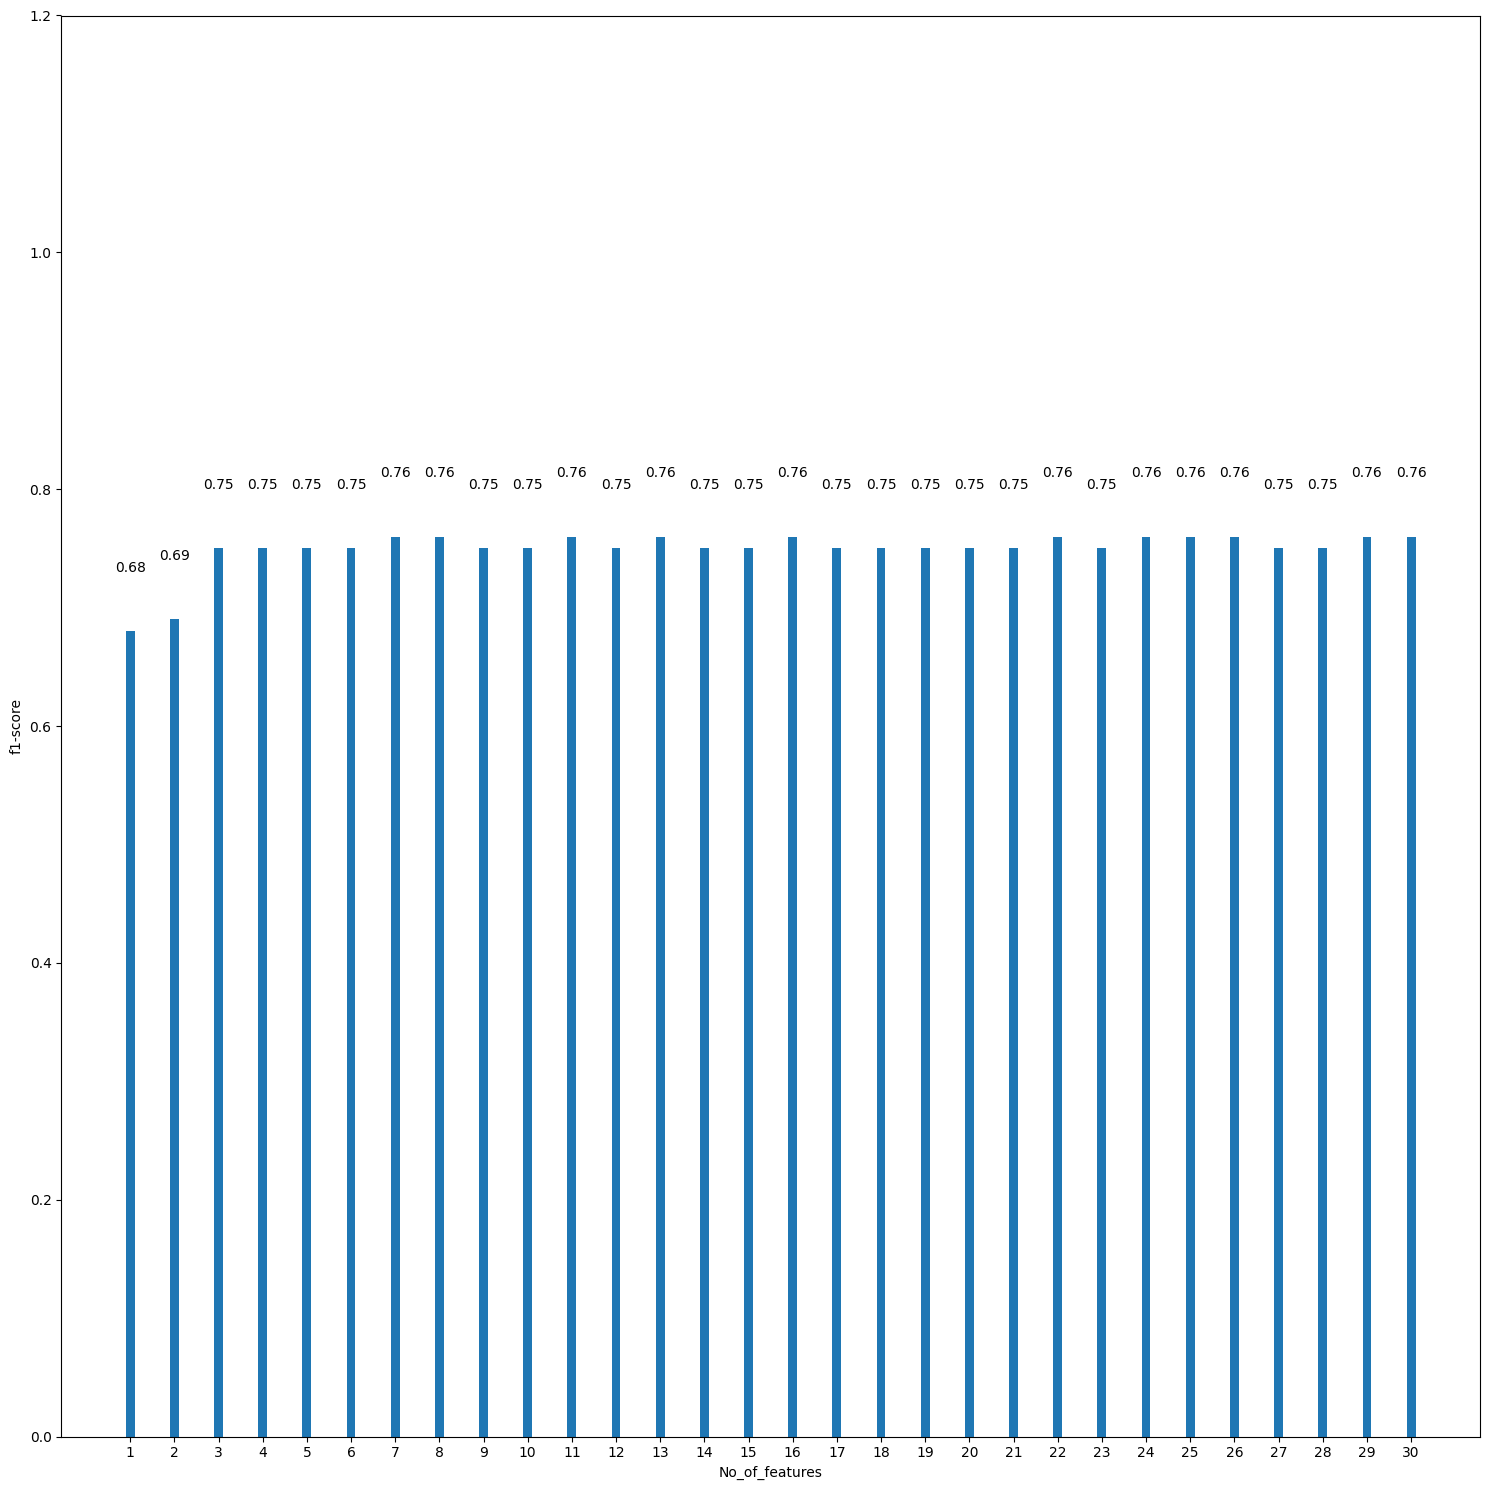

In [30]:
# Plotting the results

fig, ax = plt.subplots(figsize=(15,15))
x = np.arange(1, 31)
y = f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel("No_of_features")
ax.set_ylabel("f1-score")
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1,31))
ax.set_xticklabels(np.arange(1,31), fontsize = 10)

for i, v in enumerate(y):
    plt.text(x = i+1, y = v+0.05, s = str(v), ha = 'center')

plt.tight_layout()

In [34]:
# looking which features are the best
select = SelectKBest(mutual_info_classif, k=7)
select.fit(X_train_v1, Y_train_v1)
select_mask = select.get_support()
selected_features_v1 = X_train_v1.columns[select_mask]
selected_features_v1

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'StreamingMovies_No internet service',
       'Contract_Two year', 'PaymentMethod_Electronic check'],
      dtype='object')

In [35]:
# Training the model on selected features V1
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
sel_X_train_v1 = X_train_v1[selected_features_v1]
sel_X_test_v1 = X_test_v1[selected_features_v1]

logmodel.fit(sel_X_train_v1, Y_train_v1)

# Predicting the Test set results
y_pred = logmodel.predict(sel_X_test_v1)

# calculating evaluation metrics
test_f1 = f1_score(Y_test_v1, y_pred)
test_precision = precision_score(Y_test_v1, y_pred)
test_recall = recall_score(Y_test_v1, y_pred)
cm = confusion_matrix(Y_test_v1, y_pred)
acc = accuracy_score(Y_test_v1, y_pred)
cl_report = classification_report(Y_test_v1, y_pred)
print(f"Test F1 score: {test_f1:.3f}")
print(f"Test Precision: {test_precision:.3f}")
print(f"Test Recall: {test_recall:.3f}")
print("Confusion Matrix: \n", cm)
print("accuracy score:", acc)
print("classification report :\n", cl_report)

Test F1 score: 0.772
Test Precision: 0.742
Test Recall: 0.804
Confusion Matrix: 
 [[404 157]
 [110 451]]
accuracy score: 0.7620320855614974
classification report :
               precision    recall  f1-score   support

           0       0.79      0.72      0.75       561
           1       0.74      0.80      0.77       561

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.76      0.76      0.76      1122



c:\Users\ayush\Desktop\vs\Customer_churn\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# saving the model
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(logmodel,f)